In [73]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import random

In [74]:
X = load_boston().data
Y = load_boston().target

In [77]:
X.shape

(506, 13)

In [78]:
Y.shape

(506,)

In [191]:
#Splitting whole data into train and test
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.1, random_state=5)

In [192]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [193]:
# creating dataframe 

boston_df_train = pd.DataFrame(X_train)

boston_df_train['Price'] = y_train



In [194]:
boston_df_train.shape

(455, 14)

In [195]:
boston_df_train.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,Price
0,-0.391042,-0.494611,-0.535603,-0.275046,-0.518897,-0.289406,-0.852121,0.744305,-0.526486,-0.717773,0.539325,0.437644,0.041981,22.2
1,-0.408514,-0.494611,0.273127,-0.275046,-1.000683,0.006805,-0.806308,0.311299,-0.526486,-0.056859,0.127438,0.282801,-0.518887,21.4
2,-0.226784,-0.494611,-0.422826,-0.275046,-0.131748,-0.270437,1.022686,-0.040871,-0.641048,-0.598689,1.180037,-1.245467,1.141866,13.5
3,-0.162560,-0.494611,1.274767,-0.275046,2.733156,-0.835134,1.079071,-1.053859,-0.526486,-0.027088,-1.703168,-1.090964,0.479022,19.4
4,-0.417443,3.150410,-1.520920,-0.275046,-1.232972,0.148344,-1.134047,2.532514,-0.870174,-0.562964,-0.513274,0.437644,-0.980693,24.7


In [196]:
boston_df_train.shape

(455, 14)

# Implementing our own sgd based on the formulaes derived in theory 



In [209]:
# initialising the variables firstly 

W = np.random.randn(1,13) # here we are giving shape as (1,13) because we have 13 features in our data starting from index 0 to 12 

intercept_b = 0  # let us initialise intercept with 0 initially

iter = 360 # assumed to run the code for 1000 iterations first

learning_rate = 0.001  # learning rate is the term "r" from theory 

#k = 30 # as we are performing SGD hence  we need to mention the batch size ---> k=50



In [210]:
# running the iterations 

for i in range(0,iter,1):  # we will be using 200 iterations in order to make our sgd optimisation converge
    # considering some temporary variables for calculation purposes
    w_temp = W
    intercept_temp = intercept_b 
    a = np.zeros((1,13))  # you will see its purpose in the coming part of code
    p = 0
    
    # as we are persofming SGD hence we need a batch size which i have mentioned in k where k = 50 (initially taken)
    k = random.randrange(2,455,1)
    
    boston_sampled_data = boston_df_train.sample(k)
    
    # now in order to perform numpy multiplication we will need data in the form of numpy arrays instea of dataframe columns
    
    data_array_sampled_train = np.array(boston_sampled_data.drop('Price',axis=1))
    
    price_array__sampled_train = np.array(boston_sampled_data['Price'])
    
    # now as we have considered k data points for our batch size hence we need to do summation k number of times hence 
    # we will be running this loop k number of times 
    
    for j in range(0,k,1):
        # vector 'a' will be storing the weight vector while we calculate it using summation while vector 'b' will store the intercept
        
        # Don't be afraid of the formula below it is just a simple mathematical equation for partial derivative whose image 
        # I will be adding in the code below
        
        # expression for dL/dW ---> here L stands for the Loss function and W is the weight vector 
        # note that we are performing the partial derivative here 
        
        a = a + data_array_sampled_train[j] * (price_array__sampled_train[j] - (np.dot(w_temp,data_array_sampled_train[j])- intercept_temp))
        
        
        # expression for dL/db ---> here L stands for the Loss function and b is the intercept.
        # note that we are performing the partial derivative here
        
        p = p + (price_array__sampled_train[j] - (np.dot(w_temp,data_array_sampled_train[j]) - intercept_temp))
        
        # now after running out from this loop we will need to put the values received in a and p in our formula for sgd
    
    W = (w_temp - (learning_rate*(a))*(-2)/k)
    
    intercept_b = (intercept_temp - (learning_rate*(p))*-2/k)
    
    y_pred=np.dot(pd.DataFrame(X_train),w_temp.T) + intercept_temp
    
    print(mean_squared_error(y_train,y_pred),"iteration number = ",i+1)
    
    
    
    

print("Code Executed")

552.8115793173499 iteration number =  1
550.6893851419745 iteration number =  2
548.5354787684156 iteration number =  3
546.5048068631835 iteration number =  4
544.3641697765987 iteration number =  5
542.1504716154933 iteration number =  6
540.0135156723857 iteration number =  7
537.9085284044095 iteration number =  8
535.6711757053306 iteration number =  9
533.5343589404699 iteration number =  10
531.4912503666881 iteration number =  11
529.404674088469 iteration number =  12
527.1586559780413 iteration number =  13
525.0263972372676 iteration number =  14
522.9387136039917 iteration number =  15
520.8267472536362 iteration number =  16
518.8250480590799 iteration number =  17
516.6767378038613 iteration number =  18
514.6054440320936 iteration number =  19
512.5119877078272 iteration number =  20
510.3827287687892 iteration number =  21
508.2752497609287 iteration number =  22
506.17332262586103 iteration number =  23
504.0722356848439 iteration number =  24
501.94465206395506 iterat

166.66639631540815 iteration number =  201
165.08800202533453 iteration number =  202
163.50451836050226 iteration number =  203
161.92937731596734 iteration number =  204
160.3948049284304 iteration number =  205
158.861702116666 iteration number =  206
157.31324034439902 iteration number =  207
155.80007272465176 iteration number =  208
154.29610344651078 iteration number =  209
152.73216179344595 iteration number =  210
151.2570259822568 iteration number =  211
149.74871600694922 iteration number =  212
148.2915892776532 iteration number =  213
146.7878714955789 iteration number =  214
145.2694978513212 iteration number =  215
143.75266083058818 iteration number =  216
142.19929022793522 iteration number =  217
140.7243619757199 iteration number =  218
139.26273088164646 iteration number =  219
137.80115878308416 iteration number =  220
136.35004657761277 iteration number =  221
134.92220839061747 iteration number =  222
133.46251146771894 iteration number =  223
132.0913709005081 i

In [211]:
print(W)

[[ 0.19775983 -0.54693517  0.74043259  1.67203693 -0.80918403  3.14161302
  -0.58206753 -0.07826739 -0.0883333  -1.25386233 -1.46906655  1.21539777
  -1.80213939]]


In [212]:
print(intercept_b)

[23.74762475]


## Now we have received the weight vector and the intercept using sgd hence what we need now isto test how it works on our boston house data

In [213]:
# let us store all the predicted values using our equation which we received from above in a list so that we can compare them 
# with their actual values

predicted_y_list = []

# note that our prediction will be on our test data which is unseen till now 

q = len(X_test)

print(q)

51


In [214]:
# hence we will need to run the loop for 152 times 

for m in range(q):
    
    product = np.dot(W,X_test[m]) + intercept_b  # althought intercept_b is a scalar then also it will get added with the vector because numpy broadcasting will take place here 
    
    # (np.dot(W,X_test[3]) + intercept_b) --- > this statement is giving an output of type "numpy.ndarray" although it gives a single number only as output
    
    # hence in order to add it into the list we need to convert it into the scaler so that we can subtract it from the actual y later on
    
    # refer this ---> https://docs.scipy.org/doc/numpy-1.14.1/reference/generated/numpy.asscalar.html
    
    predicted_y_list.append(np.asscalar(product))
    

In [215]:
print(predicted_y_list[0:5])

[34.03647028174309, 27.70056174756405, 27.198795653446318, 11.066499786615465, 39.586380432984356]


## Now as we have received the predicted y values and we already have the actual y values from our test dataset hence now we can easily plot a graph between them showing how much they vary.

Text(0.5, 1.0, 'Comparison --> Actual House price vs Predicted House price For manually Implemented SGD')

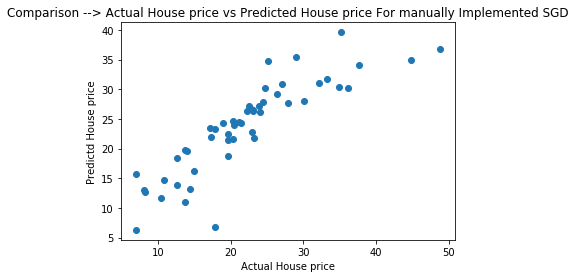

In [221]:
# plotting 

plt.scatter(y_test,predicted_y_list)
plt.xlabel('Actual House price')
plt.ylabel('Predictd House price')
plt.title('Comparison --> Actual House price vs Predicted House price For manually Implemented SGD')



## Now our immediate task is to see how far away are our predicted values from the actual values which directly means the erros there are various type of error measures but we will be using Mean Squared Error for this purpose 

In [217]:
len(y_test)

51

In [218]:
len(predicted_y_list)

51

In [219]:
MSE = mean_squared_error(y_test,predicted_y_list)

print("The mean squared error for above data is ", MSE)

The mean squared error for above data is  23.169325246438593


## Using the inbuilt SGD of sklearn

In [220]:
clf = SGDRegressor()
clf.fit(X_train,y_train)
print(mean_squared_error(y_test, clf.predict(X_test)))

17.316004115382064


Text(0.5, 1.0, 'Comparison --> Actual House price vs Predicted House price For Sklearn Implemented SGD')

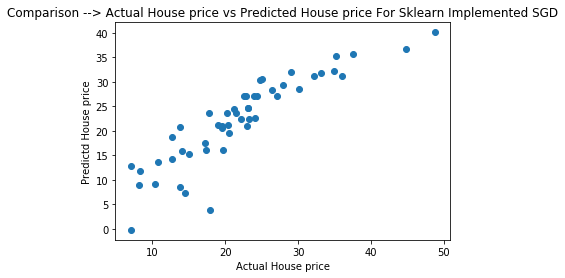

In [222]:
# plotting 

plt.scatter(y_test,clf.predict(X_test))
plt.xlabel('Actual House price')
plt.ylabel('Predictd House price')
plt.title('Comparison --> Actual House price vs Predicted House price For Sklearn Implemented SGD')

# We can clearly see that there is a little difference in the mean squared error for the manual implementation of SGD and the sklearn implementation of SGD.

## Comparison of weights of W vector for both of the implementations

In [223]:
print("Absolute values of the manually implemented SGD weight vector",np.absolute(W))

Absolute values of the manually implemented SGD weight vector [[0.19775983 0.54693517 0.74043259 1.67203693 0.80918403 3.14161302
  0.58206753 0.07826739 0.0883333  1.25386233 1.46906655 1.21539777
  1.80213939]]


In [224]:
print("Absolute values of the Sklearn implemented SGD weight vector",np.absolute(clf.coef_))

Absolute values of the Sklearn implemented SGD weight vector [0.84967382 0.56945941 0.31470784 0.89292223 0.96679116 3.18632025
 0.252425   2.14235906 0.84121742 0.36905084 1.78184724 1.03276892
 3.68698684]


In [233]:
len(np.absolute(clf.coef_))

13

In [234]:
W.shape

(1, 13)

In [235]:
np.absolute(W).shape

(1, 13)

In [236]:
np.absolute(clf.coef_).shape

(13,)

## Tabular representation of the same comparison

In [242]:
table = PrettyTable()
table.field_names = ['Manual implementation of SGD', 'Sklearn implementation of SGD']

for i in range(len(np.absolute(clf.coef_))):
    table.add_row([(np.absolute(W)[0][i]),np.absolute(clf.coef_)[i]])
print(table)

+------------------------------+-------------------------------+
| Manual implementation of SGD | Sklearn implementation of SGD |
+------------------------------+-------------------------------+
|     0.19775982778873508      |       0.849673817458087       |
|      0.5469351679189904      |       0.5694594095246961      |
|      0.7404325859116031      |      0.31470783552063475      |
|      1.6720369295560906      |       0.8929222260976756      |
|      0.8091840296847326      |       0.9667911624597837      |
|      3.141613016301469       |       3.186320253749258       |
|      0.5820675285114666      |      0.25242500395231554      |
|     0.07826739028619853      |       2.142359062369862       |
|     0.08833329820189378      |       0.8412174223115585      |
|      1.2538623271063285      |      0.36905083922966747      |
|      1.4690665533635052      |       1.7818472441506517      |
|      1.2153977728421064      |       1.0327689218294063      |
|       1.80213938975846 

# Summary and steps

### Here in order to find which number of iterations suits the best to our model for getting the minimun loss in case of manual implementation of sgd we printed our MSE value with every iterations and accordingly selected that iteration value to be the best where we found our MSE was converging to a minimum value and after that it started increasing gradually.

#### There is a slight difference between the sklearn implementation MSE and the manual implementation MSE. Sk learn implemenatation gives it out to be 17.3 and manual gives it out to be 23. I have tried every possible change and this is the best I am getting.